<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/Practica2U3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE A

# 1.- Seleccionar una marca y obtener los datos:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='AAPL',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2022-07-01',        # Fecha de inicio
    end='2025-05-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume
Date,,,,,,


In [ ]:
pip install alpha_vantage

# 2.- Graficar la serie de tiempo

In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'NP1OLRVZ3YSCPCWY'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de AAPL
ticker = 'AAPL'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2022-07-01'
fin = '2025-05-08'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Volume
date,,,,,
2025-05-08,197.720,200.05,194.6796,197.49,50478872.0
2025-05-07,199.170,199.44,193.2500,196.25,68616943.0
2025-05-06,198.210,200.65,197.0200,198.51,51216482.0
2025-05-05,203.100,204.10,198.2100,198.89,69018452.0
2025-05-02,206.090,206.99,202.1600,205.35,101010621.0
...,...,...,...,...,...
2022-07-08,145.265,147.55,145.0000,147.04,64547798.0
2022-07-07,143.290,146.55,143.2800,146.35,66253709.0
2022-07-06,141.355,144.12,141.0800,142.92,74064254.0


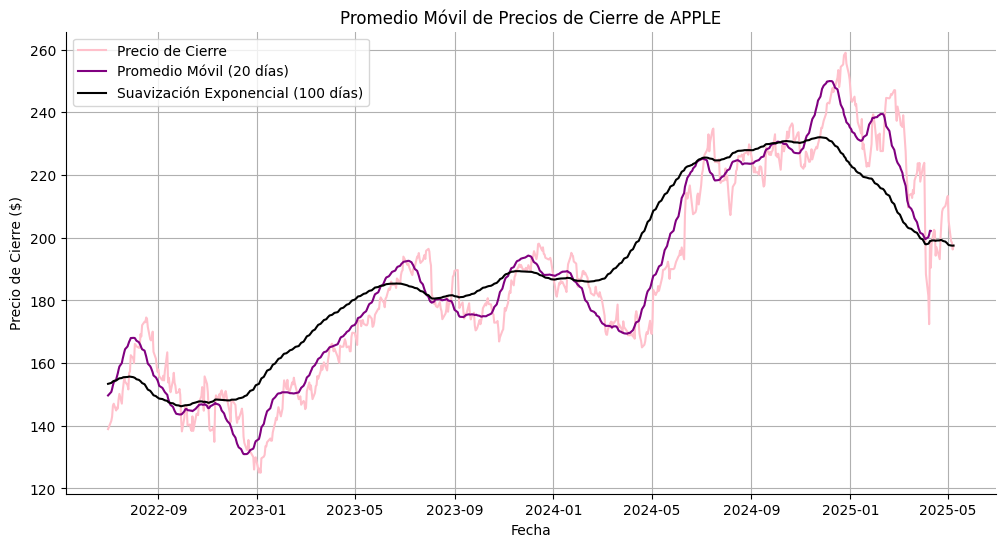

In [ ]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['AAPL_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['AAPL_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['AAPL_Close'], label='Precio de Cierre', color='pink')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='purple')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de APPLE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La acción de APPLE experimentó una tendencia alcista significativa desde mediados de 2022 hasta finales de 2024, marcada por fluctuaciones y correcciones a corto plazo.

Los promedios móviles de 20 y 100 días ayudaron a suavizar el precio y a identificar esta tendencia general.

Sin embargo, a partir de finales de 2024 y principios de 2025, se observa una corrección más pronunciada en el precio de la acción, sugiriendo un posible cambio de tendencia o al menos una fase bajista a corto plazo.

El cruce del precio por debajo de los promedios móviles en este último periodo podría interpretarse como una señal de debilidad.

En resumen, el gráfico refleja un periodo de crecimiento importante para la acción de APPLE seguido de una corrección reciente, lo que sugiere que la dinámica del precio ha cambiado en el corto plazo.

Para tener una perspectiva más completa, sería útil analizar datos más recientes y considerar otros factores fundamentales y técnicos.

# PARTE B

# Prueba Dickey-Fuller Aumentada

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['AAPL_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -0.9259256065875195
p-value: 0.7793149064741551
La tendencia no es estacionaria (aceptamos la hipótesis nula).


La tendencia no es estacionaria (aceptamos la hipótesis nula).

Esto se debe a que el valor p (0.7793149064741551) es mayor que el nivel de significancia establecido (0.05).

 En una prueba de Dickey-Fuller, la hipótesis nula es que la serie de tiempo tiene una raíz unitaria, lo que implica que no es estacionaria.

 Como el valor p es alto, no rechazamos esta hipótesis.

# PARTE C

# 1.- Regresión polinomial

# 2.- Graficar los Residuales

# Grado 1

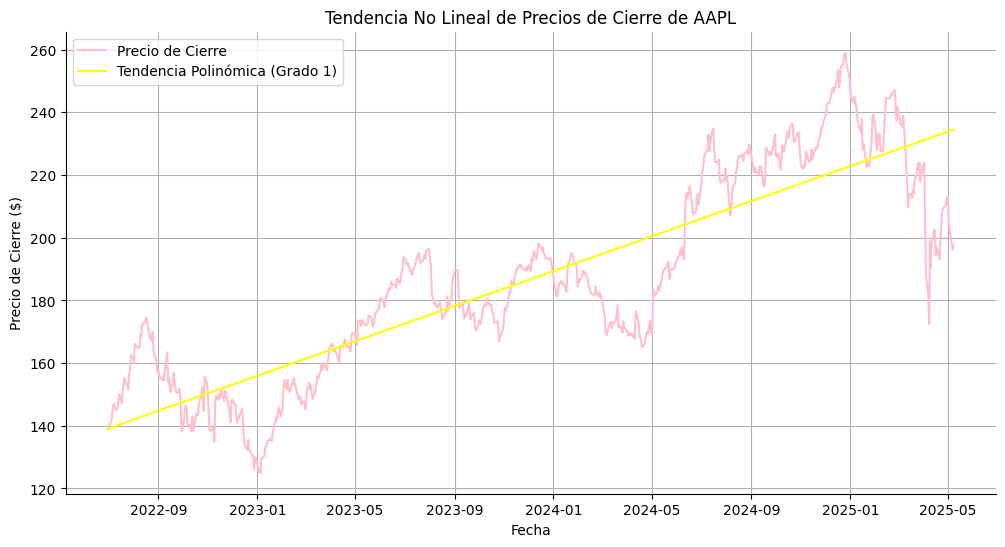

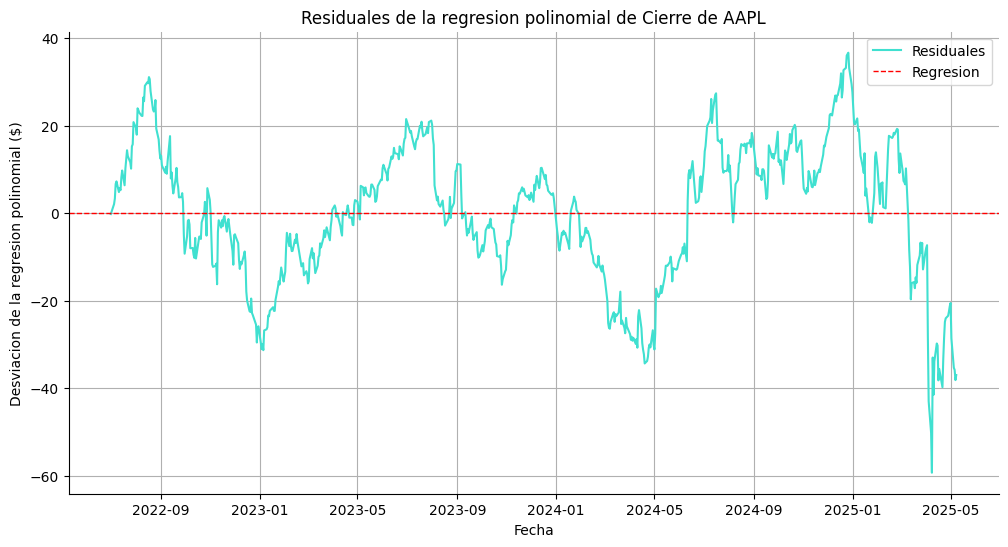

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 1
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='pink'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='yellow')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='turquoise')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El precio de cierre de AAPL muestra una tendencia general al alza a lo largo del tiempo, aunque con fluctuaciones significativas.

 La línea de tendencia polinómica de grado 1 (la línea amarilla) ilustra esta dirección ascendente general.

 Sin embargo, la volatilidad del precio (las variaciones en la línea roja del precio de cierre) sugiere que, si bien existe una tendencia positiva a largo plazo, los precios diarios pueden experimentar movimientos considerables hacia arriba y hacia abajo.

 Los residuales de la regresión polinomial de grado 1 muestran un patrón que sugiere que el modelo lineal simple (la tendencia lineal que vimos en el gráfico anterior) podría no capturar completamente la dinámica del precio de cierre de AAPL.

Observamos que los residuales (la línea azul claro) no están distribuidos de manera completamente aleatoria alrededor de cero (la línea punteada roja).

Se aprecian periodos donde los residuales tienden a ser consistentemente positivos o negativos, lo que indica que el modelo podría estar subestimando o sobreestimando el precio en ciertos momentos.

# Grado 2

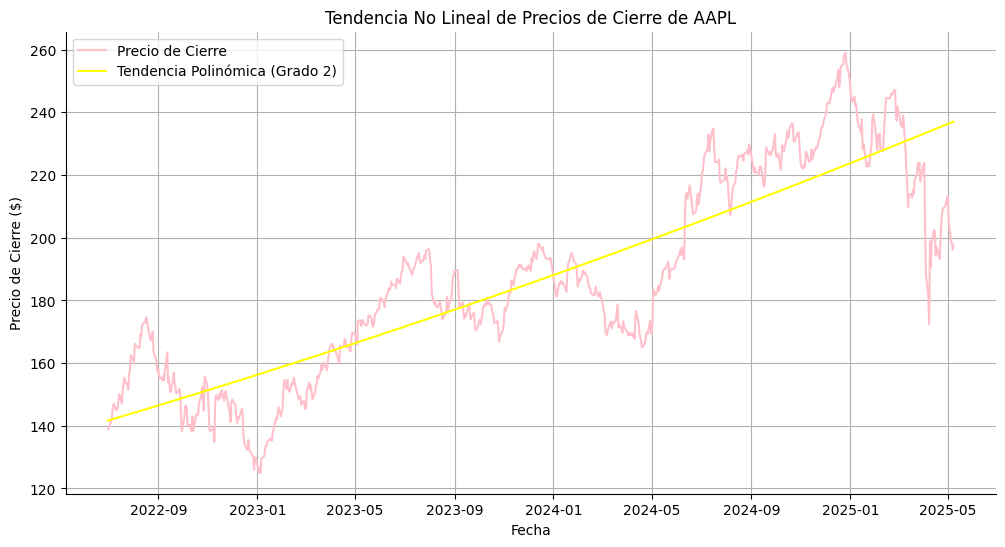

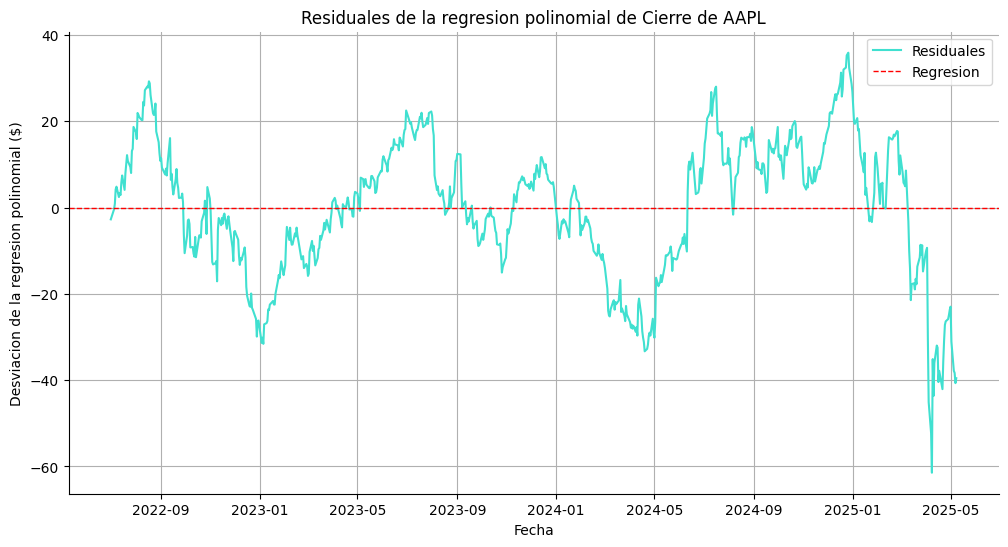

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='pink'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='yellow')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='turquoise')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El precio de cierre de AAPL sigue mostrando una tendencia general al alza, pero la línea de tendencia polinómica de grado 2 (la curva amarilla) sugiere que esta tendencia podría no ser estrictamente lineal. La curvatura de la línea de tendencia indica que la tasa de crecimiento del precio podría estar acelerándose o desacelerándose con el tiempo.

En comparación con la tendencia lineal que vimos anteriormente, esta tendencia cuadrática parece ajustarse un poco mejor a los movimientos del precio, capturando parte de la curvatura que se aprecia en los datos del precio de cierre (la línea roja). Esto sugiere que un modelo no lineal podría ser más apropiado para describir la evolución del precio de AAPL durante este periodo.

Sin embargo, al igual que con la tendencia lineal, las fluctuaciones significativas del precio alrededor de la línea de tendencia polinómica persisten, lo que indica que todavía existe volatilidad y que el modelo no predice perfectamente cada movimiento del precio.

Al comparar este gráfico de residuales con el de la regresión lineal, observamos que los residuales de la regresión polinomial de grado 2 parecen estar distribuidos de manera más aleatoria alrededor de cero (la línea punteada roja).

Aunque todavía se aprecian algunas secuencias de residuales positivos o negativos, la magnitud general de estas secuencias parece menor que en el caso de la regresión lineal.

 Esto sugiere que el modelo polinomial de grado 2 captura mejor la dinámica del precio de cierre de AAPL que el modelo lineal simple.

# Grado 3

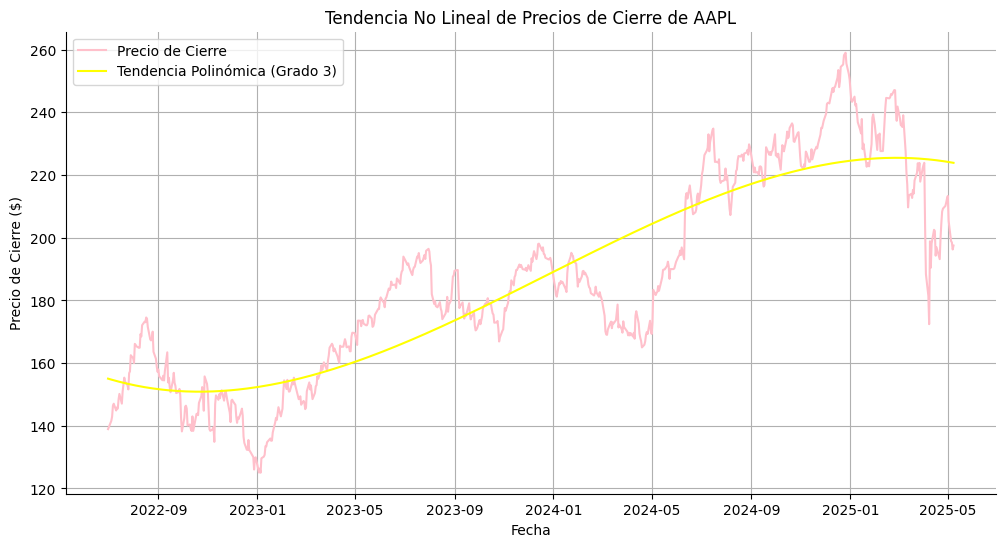

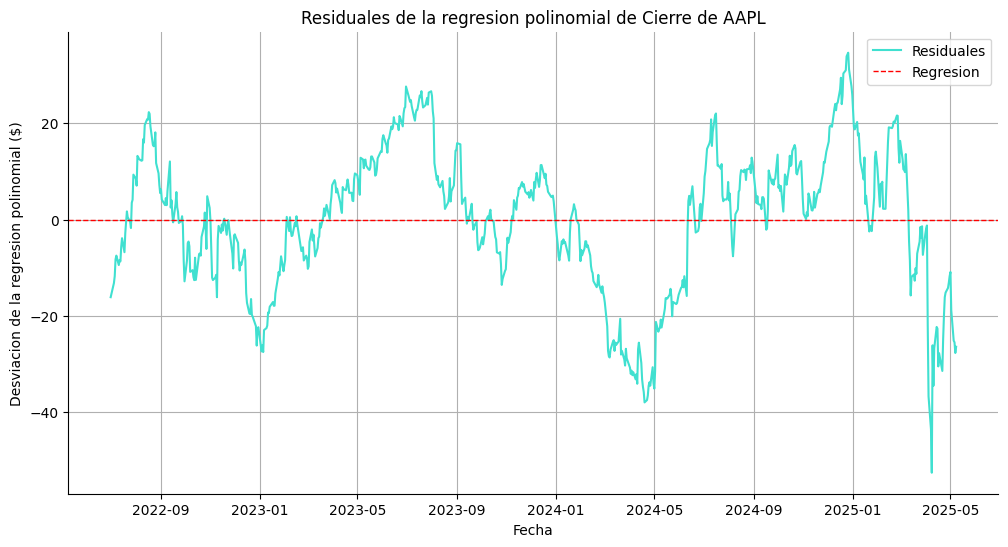

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['AAPL_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 3
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='pink'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='yellow')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='turquoise')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La línea roja representa el precio de cierre diario, mostrando las fluctuaciones del mercado.

La línea amarilla superpuesta representa una "Tendencia Polinómica (Grado 3)", que intenta suavizar las variaciones diarias y mostrar la dirección general del precio a lo largo del tiempo.

Parece que el precio de las acciones de Apple ha tenido una tendencia general al alza desde mediados de 2022 hasta principios de 2025, aunque con altibajos significativos.

La tendencia polinómica sugiere una aceleración en el crecimiento del precio durante la mayor parte de 2024, seguida de una posible estabilización o incluso un ligero descenso a principios de 2025.



# 3.- Prueba de estacionariedad en los residuales

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:(residuales)', adf_test[0])
print('p-value:(residuales)', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF:(residuales) -2.933243516169888
p-value:(residuales) 0.041616555791956895
La tendencia es estacionaria (rechazamos la hipótesis nula).


La tendencia de los residuales es estacionaria.

Esto se debe a que el p-valor (0.0416) obtenido de la prueba ADF es menor que el nivel de significancia que se haya establecido (aunque no se especifica en la imagen, un nivel común es 0.05).

Cuando el p-valor es menor que el nivel de significancia, se rechaza la hipótesis nula.
En la prueba ADF aplicada a los residuales de una regresión de tendencia, la hipótesis nula es que existe una raíz unitaria en los residuales, lo que implicaría que la tendencia no es estacionaria.

# 4.- Inferir la Estacionalidad y Aplicar una Prueba de Hipótesis:

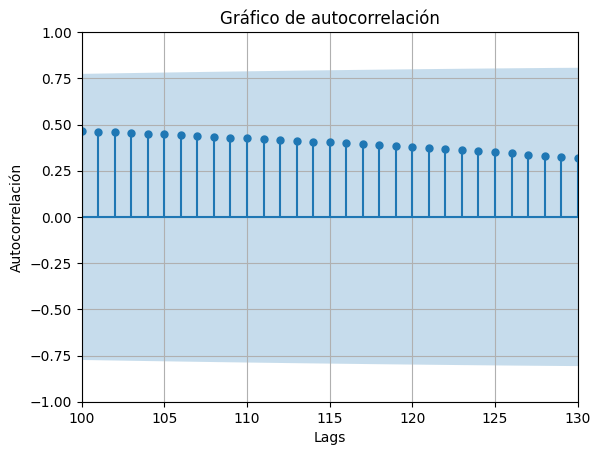

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['AAPL_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

Este correlograma nos dice que hay una autocorrelación positiva significativa a corto plazo en los residuales de tu modelo, lo que indica que los errores consecutivos tienden a estar correlacionados.

Esto sugiere que el modelo podría ser mejorado para capturar esta dependencia temporal, aunque la autocorrelación no persiste a largo plazo.

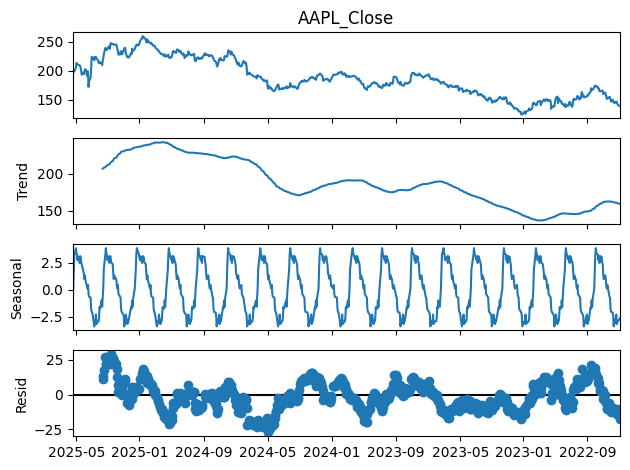

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['AAPL_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

La descomposición estacional nos permite entender mejor los diferentes componentes que influyen en el precio de cierre de las acciones de Apple durante el periodo analizado. Podemos observar que:
 * Existe una tendencia subyacente que varía con el tiempo, mostrando fases de crecimiento, estabilidad y declive.
 * Hay un patrón estacional aparente que se repite anualmente, sugiriendo cierta regularidad en las fluctuaciones del precio dentro de cada año.
 * Además de la tendencia y la estacionalidad, hay un componente residual que representa la variabilidad no explicada por estos dos factores, lo que indica la presencia de otros eventos o ruido aleatorio que afectan el precio de las acciones.

Esta descomposición puede ser útil para comprender mejor el comportamiento del precio de las acciones, identificar patrones recurrentes y potencialmente mejorar los modelos de pronóstico al considerar estos diferentes componentes por separado.